# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# create dataframe of cities

cities_df=pd.DataFrame(cities)





635


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

cities_df.columns = ['City']
cities_df

,City
0,bluff
1,rikitea
2,gao
3,leningradskiy
4,vanavara
5,richards bay
6,jandaia do sul
7,kavaratti
8,cape town
9,victoria


In [5]:
cities_df['Latitude']=""
cities_df['Longitude']=""
cities_df['Temperature']=""
cities_df['Humidity']=""
cities_df['Wind_Speed']=""
cities_df['Cloudiness']=""
cities_df

,City,Latitude,Longitude,Temperature,Humidity,Wind_Speed,Cloudiness
0,bluff,,,,,,
1,rikitea,,,,,,
2,gao,,,,,,
3,leningradskiy,,,,,,
4,vanavara,,,,,,
5,richards bay,,,,,,
6,jandaia do sul,,,,,,
7,kavaratti,,,,,,
8,cape town,,,,,,
9,victoria,,,,,,


In [6]:
cities_df=cities_df.head()

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    time.sleep(1)
    
    city= row['City']
    
# assemble url and make API request
    print(f"Retrieving Results for Index {index}:{city}.")
    response = requests.get(query_url + city).json()
    
    
    
    
# response
#     results=response['results']
    
    try:
        cities_df.loc[index, 'Latitude'] =response['coord']['lat']
        
        cities_df.loc[index, 'Longitude'] =response['coord']['lon']        
        cities_df.loc[index, 'Temperature'] =response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] =response['main']['humidity']
        cities_df.loc[index, 'Wind_Speed'] =response['wind']['speed']
        cities_df.loc[index, 'Cloudiness'] =response['clouds']['all']
   
  
#         print(f"Retrieving Results for Index {cities_df}{lat}{temp}{humidity}{wind}{temp}.")

    except (KeyError, IndexError):
            print("Missing field/result... skipping.")



Retrieving Results for Index 0:bluff.


C:\Users\mcoon\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mcoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mcoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mcoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value i

Retrieving Results for Index 1:rikitea.
Retrieving Results for Index 2:gao.
Retrieving Results for Index 3:leningradskiy.
Retrieving Results for Index 4:vanavara.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.to_csv(output_data_file)

cities_df

,City,Latitude,Longitude,Temperature,Humidity,Wind_Speed,Cloudiness
0,bluff,-23.58,149.07,59.27,40,10.54,0
1,rikitea,-23.12,-134.97,74.93,79,14.38,100
2,gao,16.28,-0.04,107.33,10,5.73,68
3,leningradskiy,69.38,178.42,31.73,92,2.37,100
4,vanavara,60.35,102.28,37.49,51,4.05,64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# import from CSV to convert data to number format for charts
new_cities=pd.read_csv(output_data_file)

# drop empty records
new_cities=new_cities.dropna(how='any')

 # convert back to data points from DataFrame
new_cities
temp_c=new_cities['Temperature']
lat_c=new_cities['Latitude']
humid_c=new_cities['Humidity']
cloud_c=new_cities['Cloudiness']
wind_c=new_cities['Wind_Speed']


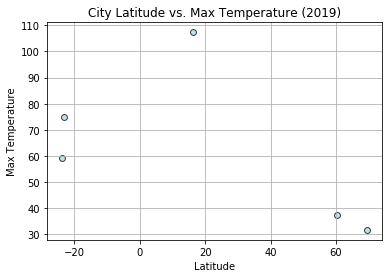

In [18]:
# build scatter plot for Latitude and Temperature

plt.scatter(lat_c,temp_c,facecolors='lightblue', edgecolors='black',s=35, alpha=.75)


# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Max Temperature (2019)')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')



# Save Figure
plt.savefig("../Images/Temp_Latitude_Scatter.png")

#### Latitude vs. Humidity Plot

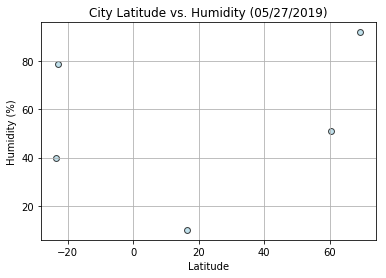

In [19]:
plt.scatter(lat_c,humid_c,facecolors='lightblue', edgecolors='black',s=35, alpha=.75)


# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Humidity (05/27/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')



# Save Figure
plt.savefig("../Images/Humidity_Latitude_Scatter.png")

#### Latitude vs. Cloudiness Plot

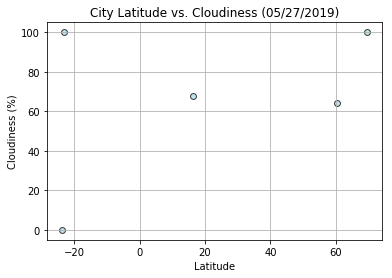

In [20]:
plt.scatter(lat_c,cloud_c,facecolors='lightblue', edgecolors='black',s=35, alpha=.75)


# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Cloudiness (05/27/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')



# Save Figure
plt.savefig("../Images/Cloudiness_Latitude_Scatter.png")

#### Latitude vs. Wind Speed Plot

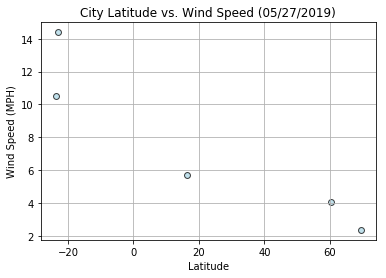

In [21]:
plt.scatter(lat_c,wind_c,facecolors='lightblue', edgecolors='black',s=35, alpha=.75)


# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Wind Speed (05/27/2019)')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')



# Save Figure
plt.savefig("../Images/Wind_Speed_Latitude_Scatter.png")